In [121]:
!pip install tsfel
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tsfel
%matplotlib inline
import os
from itertools import product


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [122]:
X_train = np.array(np.load("../X_train.npy"))
X_test = np.array(np.load("../X_test.npy"))
Y_train = np.array(np.load("../Y_train.npy"))
Y_test = np.array(np.load("../Y_test.npy"))

In [123]:
X_train = np.sum(X_train**2, axis = 2)
X_test = np.sum(X_test**2, axis = 2)
classes = {1 : "WALKING",2 :"WALKING_UPSTAIRS",3 : "WALKING_DOWNSTAIRS",4 : "SITTING",5 : "STANDING",6 : "LAYING"}
master_dataset = pd.DataFrame(X_train)

In [124]:
data_df = master_dataset
scaler = StandardScaler()
scaler.fit(data_df)
scaled_data = scaler.transform(data_df)

In [125]:
principal=PCA(n_components=2)
principal.fit(scaled_data)
reduced_data=principal.transform(scaled_data)

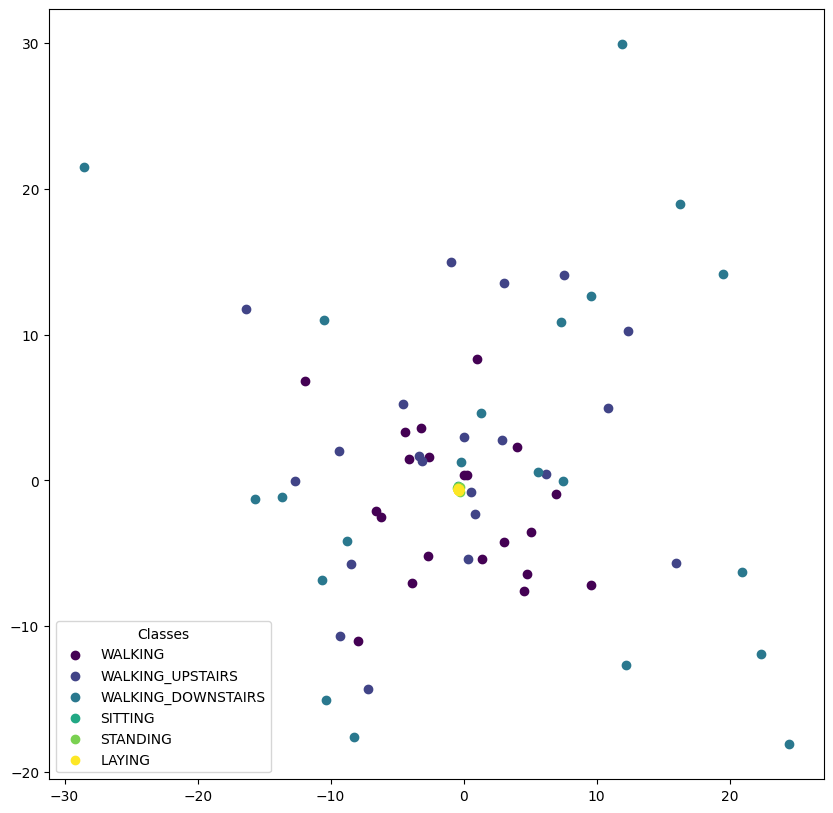

In [126]:
labels = Y_train
unique_labels = np.unique(labels)
cmap = plt.get_cmap('viridis', len(unique_labels))
plt.figure(figsize=(10, 10))
for i, label in enumerate(unique_labels):
    plt.scatter(reduced_data[:, 0][labels==label], reduced_data[:, 1][labels==label], color=cmap(i), label= classes[label])

plt.legend(title='Classes')
plt.show()

In [127]:
%%capture
feature_df = pd.DataFrame()
cfg = tsfel.get_features_by_domain("statistical")
for i in range(len(master_dataset)):
    time_series = master_dataset.iloc[i, :-1]
    features = tsfel.time_series_features_extractor(cfg, time_series, fs = 50)
    feature_df = pd.concat([feature_df, features], ignore_index=True)

In [128]:
scaler_new = StandardScaler()
scaled_feature_data = scaler_new.fit_transform(feature_df)
principal_new=PCA(n_components=2)
principal_new.fit(scaled_feature_data)
reduced_feature_data=principal_new.transform(scaled_feature_data)

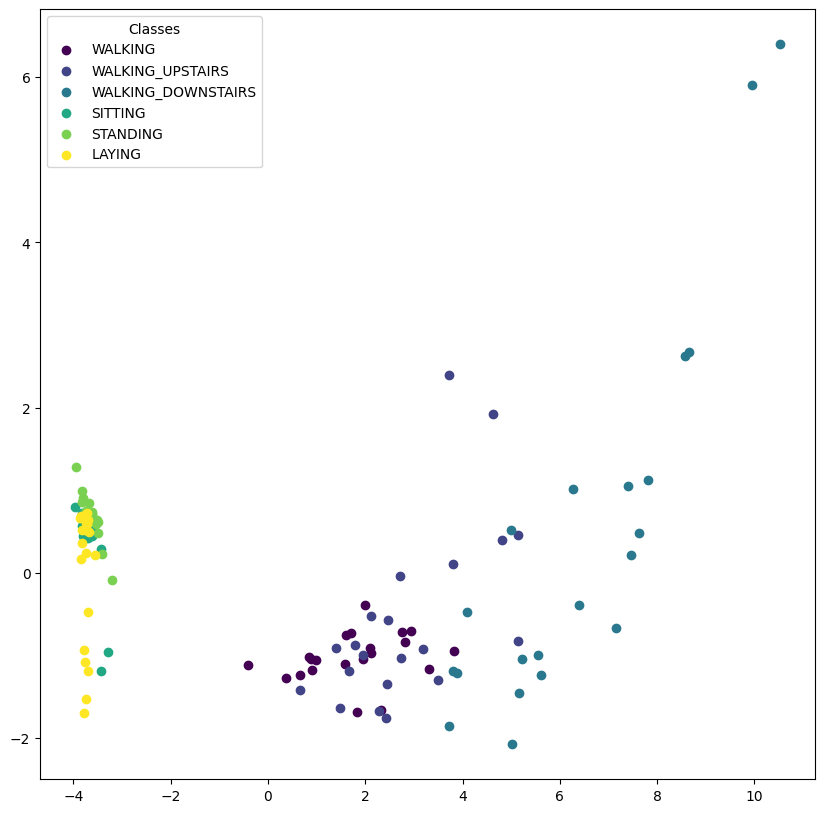

In [129]:
cmap = plt.get_cmap('viridis', len(unique_labels))
plt.figure(figsize=(10, 10))
for i, label in enumerate(unique_labels):
    plt.scatter(reduced_feature_data[:, 0][labels==label], reduced_feature_data[:, 1][labels==label], color=cmap(i), label = classes[label])

plt.legend(title='Classes')
plt.show()

In [130]:
dataframeX = pd.read_csv(r'../HAR/UCI HAR Dataset/train/X_train.txt',delim_whitespace=True,header=None)
dataframeY = pd.read_csv(r'../HAR/UCI HAR Dataset/train/y_train.txt',delim_whitespace=True,header=None)
feature_labels = pd.read_csv(r'../HAR/UCI HAR Dataset/features.txt',delim_whitespace=True,header=None)

In [131]:
scaler_new = StandardScaler()
scaled_feature_data_UCI = scaler_new.fit_transform(dataframeX)
principal_new=PCA(n_components=2)
principal_new.fit(scaled_feature_data_UCI)
reduced_feature_data_UCI = principal_new.transform(scaled_feature_data_UCI)

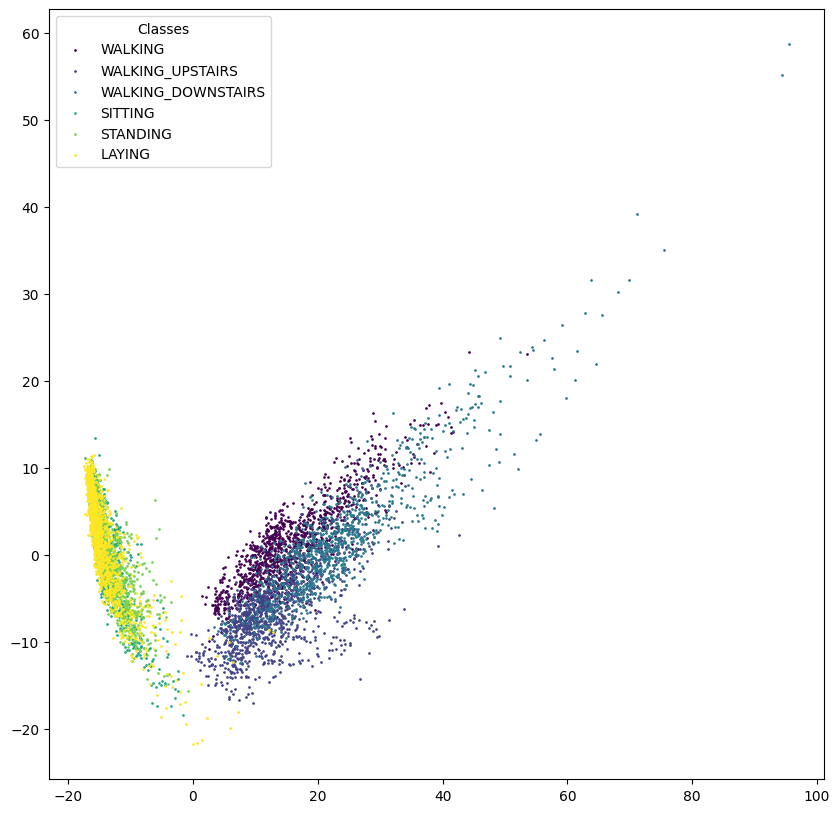

In [132]:
labels_num = dataframeY.iloc[:,0].to_numpy()
unique_labels = np.unique(labels_num)
cmap = plt.get_cmap('viridis', len(unique_labels))
plt.figure(figsize=(10, 10))
for i, label in enumerate(unique_labels):
    plt.scatter(reduced_feature_data_UCI[:, 0][labels_num==label], reduced_feature_data_UCI[:, 1][labels_num==label], color=cmap(i), label = classes[label], s = 0.9)

plt.legend(title='Classes')
plt.show()

**Question 4**

Here we have calculated the correlation coefficient matrix for the features provided already in the UCI HAR dataset. A heatmap is also plotted for better visualisation (labels ommitted for clarity) and a dataframe of pairs of redundant features(correlation coeff > 0.98) is also made and displayed.

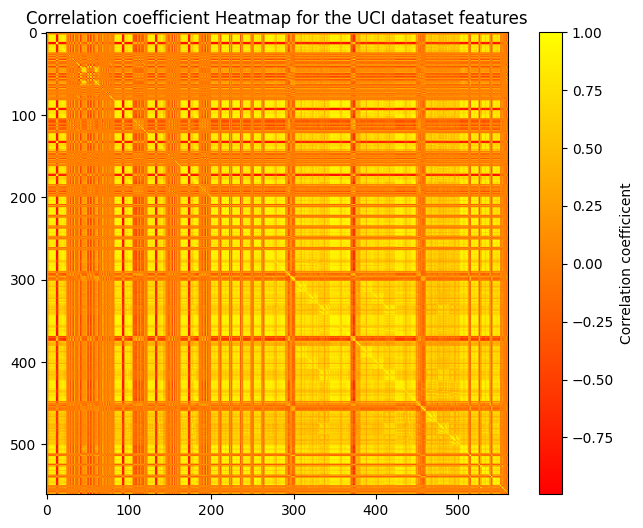

,feature1,feature2
0,tBodyAcc-mad()-X,tBodyAcc-std()-X
1,tBodyAcc-mad()-Y,tBodyAcc-std()-Y
2,tBodyAcc-mad()-Z,tBodyAcc-std()-Z
3,tBodyAcc-max()-X,tBodyAcc-std()-X
4,tBodyAcc-iqr()-X,tBodyAcc-std()-X
...,...,...
475,fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-mad()
476,fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-sma()
477,fBodyBodyGyroJerkMag-entropy(),tBodyAccJerkMag-entropy()
478,fBodyBodyGyroJerkMag-entropy(),fBodyGyro-entropy()-Y


In [133]:
corr_matrix_dataset_features = dataframeX.corr()

plt.figure(figsize=(8, 6))

plt.imshow(corr_matrix_dataset_features, cmap='autumn')

plt.colorbar(label="Correlation coefficicent")
plt.title('Correlation coefficient Heatmap for the UCI dataset features')
plt.show()

corr_matrix_dataset_features.columns = feature_labels.iloc[:,1].to_numpy()

corr_matrix_dataset_features.index = feature_labels.iloc[:,1].to_numpy()

redundancies_UCI = pd.DataFrame(columns=["feature1", "feature2"])

for i in (range(len(corr_matrix_dataset_features))):
    for j in (range(len(corr_matrix_dataset_features))):
        if(corr_matrix_dataset_features.iloc[i,j] > 0.98 and i > j):
            redundancies_UCI.loc[len(redundancies_UCI)] = [corr_matrix_dataset_features.index[i], corr_matrix_dataset_features.columns[j]]

redundancies_UCI

**Correaltion matrix for features obtained from TSFEL featurisation** is as follows:

First we drop all the features which have the same value for all entries, since their variance is zero and their correlation coefficient with any other feature will turn out to be zero. These features are practically useless for training the decision tree too.

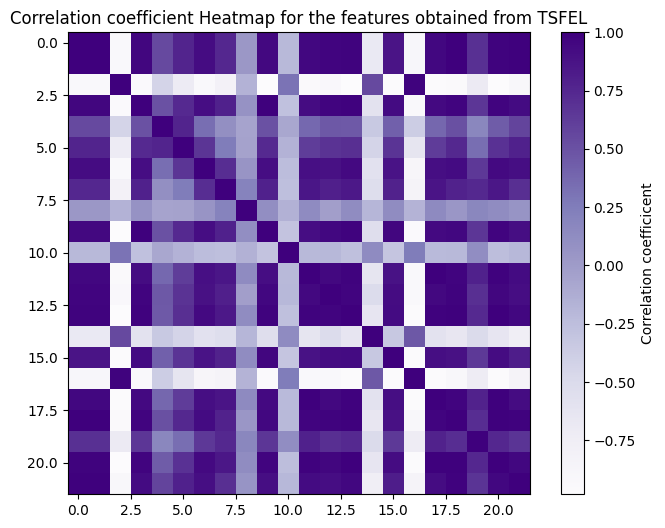

,feature1,feature2
0,0_Average power,0_Absolute energy
1,0_Interquartile range,0_ECDF Percentile_1
2,0_Peak to peak distance,0_Max
3,0_Root mean square,0_Absolute energy
4,0_Root mean square,0_Average power
5,0_Root mean square,0_Mean absolute deviation
6,0_Standard deviation,0_Max
7,0_Standard deviation,0_Mean absolute deviation
8,0_Standard deviation,0_Peak to peak distance
9,0_Standard deviation,0_Root mean square


In [134]:
# remove the features where the variance is zero, since these features arent useful and the correaltion coefficient is also zero.
feature_df = feature_df.loc[:, feature_df.nunique() != 1]

corr_matrix_tsfel_features = feature_df.corr()

plt.figure(figsize=(8, 6))

plt.imshow(corr_matrix_tsfel_features, cmap='Purples')

plt.colorbar(label="Correlation coefficicent")
plt.title('Correlation coefficient Heatmap for the features obtained from TSFEL')
plt.show()


redundancies_TSFEL = pd.DataFrame(columns=["feature1", "feature2"])

for i in (range(len(corr_matrix_tsfel_features))):
    for j in (range(len(corr_matrix_tsfel_features))):
        if(corr_matrix_tsfel_features.iloc[i,j] > 0.98 and i > j):
            redundancies_TSFEL.loc[len(redundancies_TSFEL)] = [corr_matrix_tsfel_features.index[i], corr_matrix_tsfel_features.columns[j]]


redundancies_TSFEL
